In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
import cv2

print("OpenCV version:", cv2.__version__)

OpenCV version: 4.8.1


In [11]:
# Directory containing your images
image_dir = 'D:/summer_intern/Dataset/DUO/images/train'
#image_dir = 'D:/summer_intern/Dataset/URPC2020_detection/JPEGImagee'
# Get a list of all image file names
#image_files = os.listdir(image_dir)
# Get a list of all image file names
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]


In [12]:

# Convert list of filenames to TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices([os.path.join(image_dir, f) for f in image_files])

In [13]:

import tensorflow as tf

def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    
    return image


In [14]:
dataset = tf.data.Dataset.from_tensor_slices(image_files)

In [15]:

dataset = dataset.map(load_and_preprocess_image)


In [16]:
len(dataset)

6671

In [1]:
# Display the images from the dataset
plt.figure(figsize=(10, 10))
for i, image in enumerate(dataset.take(16)):  # Take the first 16 images
    plt.subplot(4, 4, i + 1)
    plt.imshow(image.numpy().astype("uint8"))  # Convert to uint8 for matplotlib
    plt.axis('off')
plt.show()

print(f"Total images: {len(image_files)}")



In [9]:
from skimage import color
from skimage.measure import shannon_entropy
import numpy as np
# Assuming 'dataset' is a collection of images loaded as TensorFlow tensors
total_uciqe = 0
total_entropy = 0
num_images = len(dataset)
# Function to calculate UCIQE
def calculate_uciqe(image):
    """Calculate UCIQE for an image."""
    img_lab = color.rgb2lab(image)
    chroma = np.sqrt(img_lab[:, :, 1]**2 + img_lab[:, :, 2]**2)
    saturation = chroma / (img_lab[:, :, 0] + 1e-6)
    uciqe = 0.4680 * np.std(chroma) + 0.2745 * np.std(saturation) + 0.2576 * np.std(img_lab[:, :, 0]) + 0.0007 * np.mean(img_lab[:, :, 0])
    return uciqe


for index, image in enumerate(dataset):
    print(f"Processing image {index + 1}...")
    
     # Calculate UCIQE
     # Save the original image in RGB format
    image_np = image.numpy()
    original_image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
    uciqe_value = calculate_uciqe(image)
    total_uciqe += uciqe_value

    # Calculate entropy
    entropy_value = shannon_entropy(image)
    total_entropy += entropy_value

# Calculate average UCIQE and entropy
average_uciqe = total_uciqe / num_images
average_entropy = total_entropy / num_images

print(f"Average UCIQE : {average_uciqe}")
print(f"Average Entropy : {average_entropy}")
print("All images have been processed and saved.")

Processing image 1...
Processing image 2...
Processing image 3...
Processing image 4...
Processing image 5...
Processing image 6...
Processing image 7...
Processing image 8...
Processing image 9...
Processing image 10...
Processing image 11...
Processing image 12...
Processing image 13...
Processing image 14...
Processing image 15...
Processing image 16...
Processing image 17...
Processing image 18...
Processing image 19...
Processing image 20...
Processing image 21...
Processing image 22...
Processing image 23...
Processing image 24...
Processing image 25...
Processing image 26...
Processing image 27...
Processing image 28...
Processing image 29...
Processing image 30...
Processing image 31...
Processing image 32...
Processing image 33...
Processing image 34...
Processing image 35...
Processing image 36...
Processing image 37...
Processing image 38...
Processing image 39...
Processing image 40...
Processing image 41...
Processing image 42...
Processing image 43...
Processing image 44.

In [22]:
print(f"Total length of dataset: {len(dataset)}")

Total length of dataset: 5168


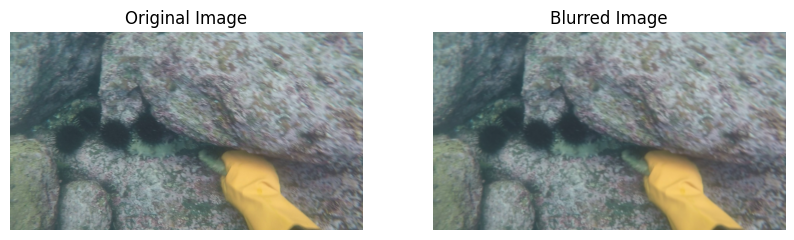

In [23]:
import cv2
import matplotlib.pyplot as plt

# Load a sample image using OpenCV
image = cv2.imread('D:/summer_intern/000012.jpg')

# Apply Gaussian blur using OpenCV
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

# Display the original and blurred images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()


In [11]:
import tensorflow as tf
import cv2
import os

# Enable eager execution
tf.compat.v1.enable_eager_execution()

In [2]:
# # # Save filters to each image in the dataset
# # output_dir = 'D:/summer_intern/Filtered_images_1'
# # if not os.path.exists(output_dir):
# #     os.makedirs(output_dir)



# # for index, image in enumerate(dataset):
# #     print(f"Processing image {index + 1}...")

# #     # Apply Low_filters and save
# #     gaussian_filter_image = gaussian_blur(image.numpy())
# #     mean_filter_image = mean_filter(image.numpy())

# #     # # Convert TensorFlow tensors to numpy arrays
# #     image_np = image.numpy()

# #     # # Apply the weighted addition
# #     enhanced_img = cv2.addWeighted(image_np, 1.5, gaussian_filter_image, -0.5, 0)
# #     enhanced_img = cv2.addWeighted(enhanced_img, 1.5, mean_filter_image, -0.5, 0)

# #     enhanced_img = tf.convert_to_tensor(enhanced_img)
# #     enhanced_image_np = enhanced_img.numpy()  # Convert back to NumPy array
# #     filtered_image = apply_high_pass_filter(enhanced_image_np)
    
# #     enhanced_img_1 = cv2.add(image_np, filtered_image)
    
# #     enhanced_img_rgb = cv2.cvtColor(enhanced_img_1, cv2.COLOR_BGR2RGB)

# #      # Calculate UCIQE
# #     uciqe_value = calculate_uciqe(enhanced_img_rgb)
# #     total_uciqe += uciqe_value

# #     # Calculate entropy
# #     entropy_value = shannon_entropy(enhanced_img_rgb)
# #     total_entropy += entropy_value
# #     cv2.imwrite(os.path.join(output_dir, f"{index}_enhanced_.jpg"), enhanced_img_rgb)
# # # Calculate average UCIQE and entropy
# # average_uciqe = total_uciqe / num_images
# # average_entropy = total_entropy / num_images

# # print(f"Average UCIQE of Filter Image: {average_uciqe}")
# # print(f"Average Entropy of Filter Image: {average_entropy}")
# # print("All images have been processed and saved.")



# # Save filters__1 to each image in the dataset
# output_dir = 'D:/summer_intern/Filtered_images_1'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# total_uciqe = 0
# total_entropy = 0
# num_images = len(image_files)

# for index, (image, image_path) in enumerate(zip(dataset, image_files)):
#     print(f"Processing image {index + 1}...")

#     # Apply Low_filters and save
#     gaussian_filter_image = gaussian_blur(image.numpy())
#     mean_filter_image = mean_filter(image.numpy())

#     # Convert TensorFlow tensors to numpy arrays
#     image_np = image.numpy()

#     # Apply the weighted addition
#     enhanced_img = cv2.addWeighted(image_np, 1.5, gaussian_filter_image, -0.5, 0)
#     enhanced_img = cv2.addWeighted(enhanced_img, 1.5, mean_filter_image, -0.5, 0)

#     enhanced_img = tf.convert_to_tensor(enhanced_img)
#     enhanced_image_np = enhanced_img.numpy()  # Convert back to NumPy array
#     filtered_image = apply_high_pass_filter(enhanced_image_np)
    
#     enhanced_img_1 = cv2.add(image_np, filtered_image)
    
#     enhanced_img_rgb = cv2.cvtColor(enhanced_img_1, cv2.COLOR_BGR2RGB)

#     # Calculate UCIQE
#     uciqe_value = calculate_uciqe(enhanced_img_rgb)
#     total_uciqe += uciqe_value

#     # Calculate entropy
#     entropy_value = shannon_entropy(enhanced_img_rgb)
#     total_entropy += entropy_value

#     # Extract the original image name
#     original_image_name = os.path.basename(image_path)
#     # Save the enhanced image with the original image name
#     cv2.imwrite(os.path.join(output_dir, f"{original_image_name}"), enhanced_img_rgb)

# # Calculate average UCIQE and entropy
# average_uciqe = total_uciqe / num_images
# average_entropy = total_entropy / num_images

# print(f"Average UCIQE of Filter Image: {average_uciqe}")
# print(f"Average Entropy of Filter Image: {average_entropy}")
# print("All images have been processed and saved.")

   

In [30]:
# import tensorflow as tf
# import cv2
# import os
# import numpy as np

# # Enable eager execution
# tf.compat.v1.enable_eager_execution()

# # Function to apply Histogram Equalization
# def histogram_equalization(image):
#     if len(image.shape) == 2:  # Grayscale image
#         if image.dtype != np.uint8:
#             image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#         return cv2.equalizeHist(image)
#     elif len(image.shape) == 3:  # Color image
#         ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
#         y = ycrcb[:, :, 0]
#         if y.dtype != np.uint8:
#             y = cv2.normalize(y, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#         ycrcb[:, :, 0] = cv2.equalizeHist(y)
#         return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
#     return image

# # Function to apply CLAHE
# def apply_clahe(image):
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#     if len(image.shape) == 2:  # Grayscale image
#         if image.dtype != np.uint8:
#             image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#         return clahe.apply(image)
#     elif len(image.shape) == 3:  # Color image
#         ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
#         y = ycrcb[:, :, 0]
#         if y.dtype != np.uint8:
#             y = cv2.normalize(y, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#         ycrcb[:, :, 0] = clahe.apply(y)
#         return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)
#     return image

# # Function to apply Denoising
# def denoise(image):
#     if image.dtype != np.uint8:
#         image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
#     if len(image.shape) == 2:  # Grayscale image
#         image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
#     return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

# # Function to apply Sharpening
# def sharpen(image):
#     kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#     return cv2.filter2D(image, -1, kernel)

# # Function to apply Sobel Filter (Edge Detection)
# def sobel_filter(image):
#     sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
#     sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
#     sobel_combined = cv2.sqrt(sobel_x**2 + sobel_y**2)
#     sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert to uint8
#     return sobel_combined

# # Save filters to each image in the dataset
# output_dir = 'D:/summer_intern/Filtered_images'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for index, image in enumerate(dataset):
#     print(f"Processing image {index + 1}...")

#     # Convert TensorFlow tensor to NumPy array
#     image_np = image.numpy()

#     # Ensure the image is in uint8 format
#     if image_np.dtype != np.uint8:
#         image_np = cv2.normalize(image_np, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

#     # Apply Histogram Equalization
#     hist_eq_image = histogram_equalization(image_np)

#     # Apply CLAHE
#     clahe_image = apply_clahe(hist_eq_image)

#     # Apply Denoising
#     denoised_image = denoise(clahe_image)

#     # Apply Sharpening
#     sharpened_image = sharpen(denoised_image)

#     # Apply Sobel Filter
#     sobel_filter_image = sobel_filter(sharpened_image)

#     # Combine filters with weighted addition
#     enhanced_img = cv2.addWeighted(image_np, 1.0, hist_eq_image, 0.2, 0)
#     enhanced_img = cv2.addWeighted(enhanced_img, 1.0, clahe_image, 0.2, 0)
#     enhanced_img = cv2.addWeighted(enhanced_img, 1.0, denoised_image, 0.2, 0)
#     enhanced_img = cv2.addWeighted(enhanced_img, 1.0, sharpened_image, 0.2, 0)
#     enhanced_img = cv2.addWeighted(enhanced_img, 1.0, sobel_filter_image, 0.2, 0)

#     # Convert back to TensorFlow tensor
#     enhanced_img = tf.convert_to_tensor(enhanced_img)

#     # Save the enhanced image
#     enhanced_image_np = enhanced_img.numpy()  # Convert back to NumPy array
#     enhanced_img_rgb = cv2.cvtColor(enhanced_image_np.astype(np.uint8), cv2.COLOR_BGR2RGB)
#     cv2.imwrite(os.path.join(output_dir, f"{index}_enhanced.jpg"), enhanced_img_rgb)


In [3]:
# import tensorflow as tf
# import cv2
# import os
# import numpy as np
# ## Filter_2
# # Enable eager execution
# tf.compat.v1.enable_eager_execution()

# # Add the new filter functions here...

# def apply_high_pass_filter(img):
#     """Apply a high-pass filter to enhance edges and details"""
#     kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
#     high_pass = cv2.filter2D(img, -1, kernel)
#     return high_pass

# def apply_clahe(img):
#     """Apply CLAHE to improve local contrast."""
#     lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#     l, a, b = cv2.split(lab)
#     clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # Adjusted clipLimit
#     l_clahe = clahe.apply(l)
#     lab_clahe = cv2.merge((l_clahe, a, b))
#     return cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

# def apply_white_balance(img):
#     """Apply white balance to correct color balance."""
#     result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#     avg_a = np.average(result[:, :, 1])
#     avg_b = np.average(result[:, :, 2])
#     result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.0)  # Adjusted factor
#     result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.0)  # Adjusted factor
#     return cv2.cvtColor(result, cv2.COLOR_LAB2BGR)

# def apply_gamma_correction(img, gamma=1.1):
#     """Apply gamma correction to adjust brightness and contrast."""
#     inv_gamma = 1.0 / gamma
#     table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
#     return cv2.LUT(img, table)
# # Save filters to each image in the dataset
# output_dir = 'D:/summer_intern/Filtered_images'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# for index, image_path in enumerate([os.path.join(image_dir, f) for f in image_files]):
#     print(f"Processing image {index + 1}...")

#     # Load the image
#     image = load_and_preprocess_image(image_path)
    
#     # Convert TensorFlow tensor to NumPy array
#     image_np = image.numpy()

#     # Ensure the image is in uint8 format
#     if image_np.dtype != np.uint8:
#         image_np = cv2.normalize(image_np, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

#     # Apply CLAHE
#     clahe_img = apply_clahe(image_np)

#     # Apply white balance
#     white_balanced_img = apply_white_balance(clahe_img)

#     # Apply gamma correction
#     gamma_corrected_img = apply_gamma_correction(white_balanced_img)

#     # Apply high-pass filter
#     high_pass_img = apply_high_pass_filter(gamma_corrected_img)

#     # Combine the original image with the high-pass filtered image carefully
#     enhanced_img = cv2.addWeighted(gamma_corrected_img, 0.8, high_pass_img, 0.2, 0)

#     # Convert back to TensorFlow tensor
#     enhanced_img_tensor = tf.convert_to_tensor(enhanced_img)

#     # Save the enhanced image
#     enhanced_image_np = enhanced_img_tensor.numpy()  # Convert back to NumPy array
#     enhanced_img_rgb = cv2.cvtColor(enhanced_image_np.astype(np.uint8), cv2.COLOR_BGR2RGB)

#      # Calculate UCIQE
#     uciqe_value = calculate_uciqe(enhanced_img_rgb)
#     total_uciqe += uciqe_value

#     # Calculate entropy
#     entropy_value = shannon_entropy(enhanced_img_rgb)
#     total_entropy += entropy_value
#     original_image_name = os.path.basename(image_path)
#     # Save the enhanced image with the original image name
#     cv2.imwrite(os.path.join(output_dir, f"{original_image_name}"), enhanced_img_rgb)



# # Calculate average UCIQE and entropy
# average_uciqe = total_uciqe / num_images
# average_entropy = total_entropy / num_images

# print(f"Average UCIQE of Filter Image: {average_uciqe}")
# print(f"Average Entropy of Filter Image: {average_entropy}")
# print("All images have been processed and saved.")




In [18]:

# Convert list of filenames to TensorFlow Dataset

# Directory containing your images
import os
image_dir = 'D:/summer_intern/Dataset/RUOD/RUOD_pic/test'


image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
dataset1 = tf.data.Dataset.from_tensor_slices([os.path.join(image_dir, f) for f in image_files])

In [19]:
import tensorflow as tf

def load_and_preprocess_image1(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image)
    # No resizing is performed here
    return image

In [20]:

dataset1 = dataset1.map(load_and_preprocess_image1)


In [16]:
import tensorflow as tf
import cv2
import os
import numpy as np
#Filter___3
alpha = 0.5  # Weight for the first image (clahe_image)
beta = 1 - alpha  # Weight for the second image (hist_eq_image)
gamma = 0  # Scalar added to each sum

# Enable eager execution
tf.compat.v1.enable_eager_execution()

# Define new filter functions
def apply_white_balance(img):
    """Apply white balance to correct color balance."""
    result = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.0)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.0)
    return cv2.cvtColor(result, cv2.COLOR_LAB2BGR)

def apply_sharpening(img):
    """Apply sharpening filter to enhance image details."""
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

def apply_histogram_equalization(img):
    """Apply histogram equalization to improve image contrast."""
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def apply_gamma_correction(img, gamma=1.0):
    """Apply gamma correction to adjust image brightness."""
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def apply_clahe_on_l(img):
    """Apply CLAHE on the L component of the LAB image."""
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    return cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR), l_clahe

# Directory to save filtered images
output_dir = 'D:/summer_intern/Filtered_images_2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for index, image_path in enumerate([os.path.join(image_dir, f) for f in image_files]):
    print(f"Processing image {index + 1}...")

    # Load the image
    image = load_and_preprocess_image(image_path)
    
    # Convert TensorFlow tensor to NumPy array
    image_np = image.numpy()

    # Ensure the image is in uint8 format
    if image_np.dtype != np.uint8:
        image_np = cv2.normalize(image_np, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Apply white balance
    balanced_image = apply_white_balance(image_np)

    # Apply sharpening
    sharpened_image = apply_sharpening(balanced_image)

    # Apply histogram equalization
    hist_eq_image = apply_histogram_equalization(sharpened_image)

    # Apply gamma correction
    gamma_corrected_image = apply_gamma_correction(balanced_image, gamma=1.2)

    # Apply CLAHE on the L component of the LAB image
    clahe_image, l_clahe = apply_clahe_on_l(gamma_corrected_image)

    # Ensure both images are float type for accurate blending
    clahe_image_float = clahe_image.astype(float)
    hist_eq_image_float = hist_eq_image.astype(float)

    # Blend the images
    blended_image = cv2.addWeighted(clahe_image_float, alpha, hist_eq_image_float, beta, gamma)

    # Convert the blended image back to uint8
    blended_image_uint8 = blended_image.astype(np.uint8)

    # Save the enhanced image
    enhanced_image_rgb = cv2.cvtColor(blended_image_uint8, cv2.COLOR_BGR2RGB)

    # Calculate UCIQE
    #uciqe_value = calculate_uciqe(enhanced_image_rgb)
    #total_uciqe += uciqe_value

    # Calculate entropy
    #entropy_value = shannon_entropy(enhanced_image_rgb)
    #total_entropy += entropy_value
    
    # Extract the original image name
    original_image_name = os.path.basename(image_path)
    
    # Save the enhanced image with the original image name
    cv2.imwrite(os.path.join(output_dir, f"{original_image_name}"), enhanced_image_rgb)

# Calculate average UCIQE and entropy
#average_uciqe = total_uciqe / num_images
#average_entropy = total_entropy / num_images

#print(f"Average UCIQE: {average_uciqe}")
#print(f"Average Entropy: {average_entropy}")
print("All images have been processed and saved.")




Processing image 1...
Processing image 2...
Processing image 3...
Processing image 4...
Processing image 5...
Processing image 6...
Processing image 7...
Processing image 8...
Processing image 9...
Processing image 10...
Processing image 11...
Processing image 12...
Processing image 13...
Processing image 14...
Processing image 15...
Processing image 16...
Processing image 17...
Processing image 18...
Processing image 19...
Processing image 20...
Processing image 21...
Processing image 22...
Processing image 23...
Processing image 24...
Processing image 25...
Processing image 26...
Processing image 27...
Processing image 28...
Processing image 29...
Processing image 30...
Processing image 31...
Processing image 32...
Processing image 33...
Processing image 34...
Processing image 35...
Processing image 36...
Processing image 37...
Processing image 38...
Processing image 39...
Processing image 40...
Processing image 41...
Processing image 42...
Processing image 43...
Processing image 44.